In [1]:
#importing Libraries
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
#reading data
df=pd.read_csv('Airbnb_Open_Data.csv',low_memory= False)

In [3]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


Descriptive Stats

In [4]:
df.describe()

,id,host id,lat,long,Construction year,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365
count,1.025990e+05,1.025990e+05,102591.000000,102591.000000,102385.000000,102190.000000,102416.000000,86720.000000,102273.000000,102280.000000,102151.000000
mean,2.914623e+07,4.925411e+10,40.728094,-73.949644,2012.487464,8.135845,27.483743,1.374022,3.279106,7.936605,141.133254
std,1.625751e+07,2.853900e+10,0.055857,0.049521,5.765556,30.553781,49.508954,1.746621,1.284657,32.218780,135.435024
min,1.001254e+06,1.236005e+08,40.499790,-74.249840,2003.000000,-1223.000000,0.000000,0.010000,1.000000,1.000000,-10.000000
25%,1.508581e+07,2.458333e+10,40.688740,-73.982580,2007.000000,2.000000,1.000000,0.220000,2.000000,1.000000,3.000000
50%,2.913660e+07,4.911774e+10,40.722290,-73.954440,2012.000000,3.000000,7.000000,0.740000,3.000000,1.000000,96.000000
75%,4.320120e+07,7.399650e+10,40.762760,-73.932350,2017.000000,5.000000,30.000000,2.000000,4.000000,2.000000,269.000000
max,5.736742e+07,9.876313e+10,40.916970,-73.705220,2022.000000,5645.000000,1024.000000,90.000000,5.000000,332.000000,3677.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

Data Cleansing

In [6]:
df.shape

(102599, 26)

In [7]:
df.columns.unique()

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

In [8]:
df['license'].isnull().count()

102599

In [9]:
#dropping useless columns since its fully empty
df.drop(['house_rules', 'license'], axis = 1, inplace= True)


In [10]:
#checking for null values
df.isnull().sum()

id                                    0
NAME                                250
host id                               0
host_identity_verified              289
host name                           406
neighbourhood group                  29
neighbourhood                        16
lat                                   8
long                                  8
country                             532
country code                        131
instant_bookable                    105
cancellation_policy                  76
room type                             0
Construction year                   214
price                               247
service fee                         273
minimum nights                      409
number of reviews                   183
last review                       15893
reviews per month                 15879
review rate number                  326
calculated host listings count      319
availability 365                    448
dtype: int64

In [11]:
#deleting rows that contain null values
df=df.dropna()
df

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,2020.0,$966,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,2007.0,$142,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,2009.0,$204,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0
5,1004098,Large Cozy 1 BR Apartment In Midtown East,45498551794,verified,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,United States,...,2013.0,$577,$115,3.0,74.0,6/22/2019,0.59,3.0,1.0,374.0
7,1005202,BlissArtsSpace!,90821839709,unconfirmed,Emma,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,United States,...,2009.0,"$1,060",$212,45.0,49.0,10/5/2017,0.40,5.0,1.0,219.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102588,6089124,"Loft Space for Events, Meetings & Shoots",85557432222,unconfirmed,Kalin,Manhattan,Flatiron District,40.74068,-73.98999,United States,...,2016.0,$618,$124,1.0,177.0,6/29/2019,3.78,4.0,1.0,410.0
102591,6090781,Columbus Ave Apt 1 block from Park,50908010324,verified,Lawrence,Manhattan,Upper West Side,40.77408,-73.98181,United States,...,2005.0,"$1,139",$228,5.0,17.0,1/4/2019,0.35,5.0,1.0,134.0
102593,6091885,"Welcoming, Clean, Cheap on St Marks",33188605074,verified,Felipe,Manhattan,East Village,40.72826,-73.98422,United States,...,2017.0,"$1,099",$220,1.0,8.0,9/6/2015,0.16,4.0,2.0,152.0
102595,6092990,Best Location near Columbia U,77864383453,unconfirmed,Mifan,Manhattan,Morningside Heights,40.80460,-73.96545,United States,...,2016.0,$837,$167,1.0,1.0,7/6/2015,0.02,2.0,2.0,395.0


In [12]:
df.isnull().sum()

id                                0
NAME                              0
host id                           0
host_identity_verified            0
host name                         0
neighbourhood group               0
neighbourhood                     0
lat                               0
long                              0
country                           0
country code                      0
instant_bookable                  0
cancellation_policy               0
room type                         0
Construction year                 0
price                             0
service fee                       0
minimum nights                    0
number of reviews                 0
last review                       0
reviews per month                 0
review rate number                0
calculated host listings count    0
availability 365                  0
dtype: int64

In [13]:
#checking if there are duplicate  rows
df.duplicated().sum()

466

In [14]:
#deleting duplicate rows
df=df.drop_duplicates()

In [15]:
df.duplicated().sum()

0

In [16]:
df['price']=df['price'].str.strip('$')
df['price']=df['price'].str.replace(',',' ')
df['price'].str.replace(' ','')

C:\Users\user\AppData\Local\Temp\ipykernel_2728\1112870144.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price']=df['price'].str.strip('$')
C:\Users\user\AppData\Local\Temp\ipykernel_2728\1112870144.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price']=df['price'].str.replace(',',' ')


0          966
1          142
4          204
5          577
7         1060
          ... 
102029     822
102030     455
102031    1078
102032     103
102040     982
Name: price, Length: 83412, dtype: object

In [17]:
#Remove all dollar signs in the price and service fee columns
df['price'] = df['price'].str.replace('$','',  regex= False)
df['service fee'] = df['service fee'].str.replace('$','',  regex= False)

#Remove all commas in the price and service fee columns
df['price'] = df['price'].str.replace(',','',  regex= False)
df['service fee'] = df['service fee'].str.replace(',','',  regex= False)

df['price'] = df['price'].str.replace(' ','',  regex= False)
df['service fee'] = df['service fee'].str.replace(' ','',  regex= False)

C:\Users\user\AppData\Local\Temp\ipykernel_2728\1024169464.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price'] = df['price'].str.replace('$','',  regex= False)
C:\Users\user\AppData\Local\Temp\ipykernel_2728\1024169464.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['service fee'] = df['service fee'].str.replace('$','',  regex= False)
C:\Users\user\AppData\Local\Temp\ipykernel_2728\1024169464.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

In [18]:
#Change all mismatched data types to the appropriate ones.
df['price'] = df['price'].astype(float)
df['service fee'] = df['service fee'].astype(float)
df['id'] = df['id'].astype(str)
df['host id'] = df['host id'].astype(str)
df['last review'] = pd.to_datetime(df['last review'])
df['Construction year'] = df['Construction year'].astype(int)

C:\Users\user\AppData\Local\Temp\ipykernel_2728\1273796822.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price'] = df['price'].astype(float)
C:\Users\user\AppData\Local\Temp\ipykernel_2728\1273796822.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['service fee'] = df['service fee'].astype(float)
C:\Users\user\AppData\Local\Temp\ipykernel_2728\1273796822.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83412 entries, 0 to 102040
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              83412 non-null  object        
 1   NAME                            83412 non-null  object        
 2   host id                         83412 non-null  object        
 3   host_identity_verified          83412 non-null  object        
 4   host name                       83412 non-null  object        
 5   neighbourhood group             83412 non-null  object        
 6   neighbourhood                   83412 non-null  object        
 7   lat                             83412 non-null  float64       
 8   long                            83412 non-null  float64       
 9   country                         83412 non-null  object        
 10  country code                    83412 non-null  object        
 11  instan

In [20]:
df

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,2020,966.0,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,2007,142.0,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,2009,204.0,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0
5,1004098,Large Cozy 1 BR Apartment In Midtown East,45498551794,verified,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,United States,...,2013,577.0,115.0,3.0,74.0,2019-06-22,0.59,3.0,1.0,374.0
7,1005202,BlissArtsSpace!,90821839709,unconfirmed,Emma,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,United States,...,2009,1060.0,212.0,45.0,49.0,2017-10-05,0.40,5.0,1.0,219.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102029,57351953,Cozy room in a 2B with backyard access,5155155913,unconfirmed,Cristina,Queens,Astoria,40.76987,-73.92679,United States,...,2018,822.0,164.0,1.0,9.0,2019-04-25,0.91,3.0,1.0,0.0
102030,57352505,An East Williamsburg Delight,71564706996,verified,Petra,Brooklyn,Bedford-Stuyvesant,40.68335,-73.91222,United States,...,2015,455.0,91.0,4.0,36.0,2018-06-27,1.28,1.0,1.0,0.0
102031,57353057,Cozy bedroom in williamsburg,83101851929,verified,Russell,Brooklyn,Williamsburg,40.70870,-73.96710,United States,...,2020,1078.0,216.0,1.0,58.0,2019-06-10,2.08,5.0,2.0,120.0
102032,57353610,Spacious Room w/ 2 Bed,69037598918,unconfirmed,Christine,Queens,Bayside,40.75047,-73.75349,United States,...,2007,103.0,21.0,7.0,40.0,2019-06-23,1.51,1.0,5.0,148.0


In [21]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,2020,966.0,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,2007,142.0,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,2009,204.0,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0
5,1004098,Large Cozy 1 BR Apartment In Midtown East,45498551794,verified,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,United States,...,2013,577.0,115.0,3.0,74.0,2019-06-22,0.59,3.0,1.0,374.0
7,1005202,BlissArtsSpace!,90821839709,unconfirmed,Emma,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,United States,...,2009,1060.0,212.0,45.0,49.0,2017-10-05,0.40,5.0,1.0,219.0


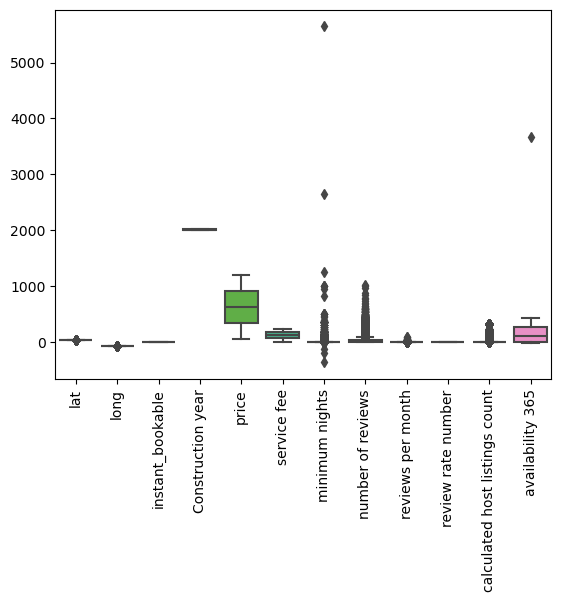

In [22]:
sns.boxplot(df)
plt.xticks(rotation=90)
plt.show()

In [23]:
def remove_outliers(df,column):
    
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    upper= Q3+1.5*IQR
    lower= Q1-1.5*IQR
    nooutliers= df[(df[column]>lower) & (df[column]<upper)]
    return nooutliers

columns = ['minimum nights','number of reviews','reviews per month','calculated host listings count','availability 365']

for i in columns:
    df=remove_outliers(df,i) 

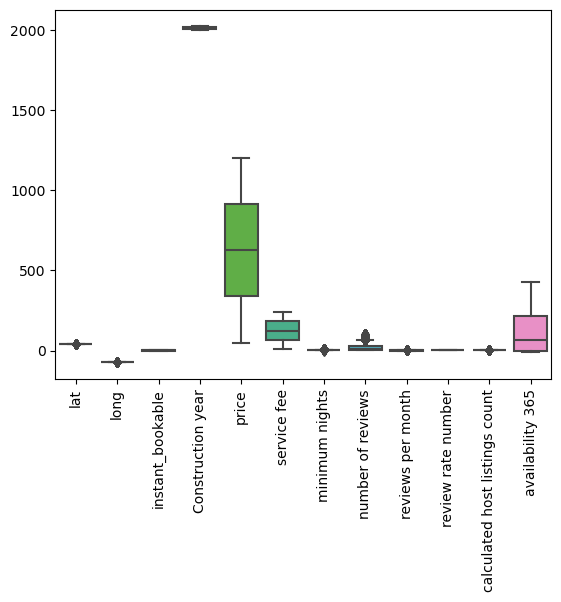

In [24]:
sns.boxplot(df)
plt.xticks(rotation=90)
plt.show()

In [25]:
df.to_csv('Air_BNB_Cleaned_Data.csv')